# Health Insurance Cost

## DESCRIPTION
Health insurance has become an indispensable part of our lives in recent years, and people are paying for it so that they are covered in the event of an accident or other unpredicted factors.
You are provided with medical costs dataset that has features such as Age, Cost, BMI.

### Objective
- Determine the factors that contribute the most in the calculation of insurance costs.
- Predict the health Insurance Cost.

### Actions to Perform:
- Find the correlation of every pair of features (and the outcome variable).
- Visualize the correlations using a heatmap.
- Normalize your inputs.
- Use the test data to find out the accuracy of the model.
- Visualize how your model uses the different features and which features have a greater effect.


#### Independent variables

1. age : age of policyholder
2. sex: gender of policy holder (female=0, male=1)
3. bmi: Body mass index, ideally 18.5 to 25
4. children: number of children / dependents of policyholder
5. smoker: smoking state of policyholder (non-smoke=0;smoker=1)
6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7. charges: individual medical costs billed by health insurance

#### Target variable

1. insuranceclaim - categorical variable (0,1)


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('insurance2.csv')

In [3]:
# Look at the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


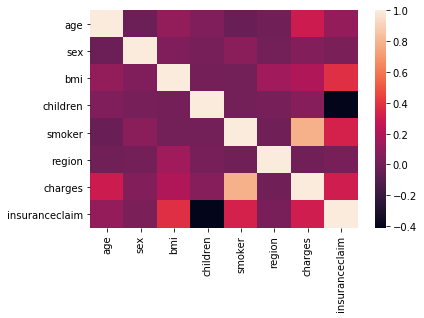

In [8]:
# Check the correlation
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns)
plt.show()

In [9]:
# check theshape
df.shape

(1338, 8)

The data set consists of record of 1338 patients in total. Using 1000 records for training and 300 records for testing, and the last 38 records to cross check our model.

In [10]:
df_train = df[:1000]
df_test = df[1000:1300]
df_check = df[1300:]

In [11]:
df_train.shape

(1000, 8)

In [12]:
y_train_label = np.asarray(df_train['insuranceclaim'])
x_train_data = np.asarray(df_train.drop('insuranceclaim',1))
y_test_label = np.asarray(df_test['insuranceclaim'])
x_test_data = np.asarray(df_test.drop('insuranceclaim',1))

Before using machine learning, let's will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier to understand the importance of each feature later, when looking at the model weights. Normalize the data such that each variable has 0 mean and standard deviation of 1.

In [13]:
means = np.mean(x_train_data, axis = 0)
std = np.std(x_train_data, axis = 0)

In [14]:
x_train_data = (x_train_data - means) / std
x_test_data = (x_test_data - means) / std

In [15]:
# Import required library for Logistic regression
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression()

In [17]:
logreg.fit(x_train_data, y_train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_predict = logreg.predict(x_test_data)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test_label)

0.86

In [20]:
logreg.score(x_test_data, y_test_label)

0.86

To get a better sense of what is going on inside the logistic regression model, visualize how our model uses the different features and which features have greater effect.

Text(0.5, 0, 'Importance')

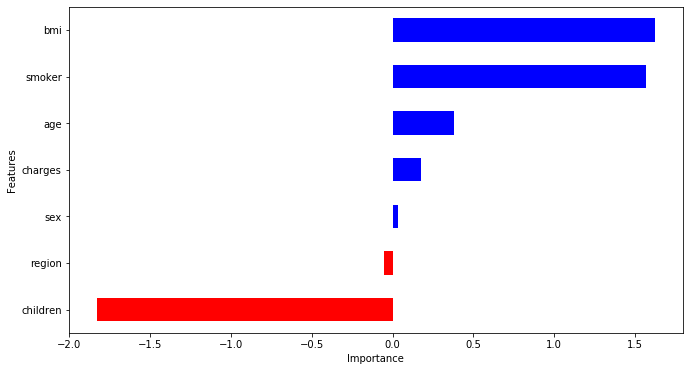

In [21]:
coeff = list(logreg.coef_[0])
labels = list(df_train.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [22]:
features.head()

,importance,positive
Features,,
children,-1.829939,False
region,-0.053891,False
sex,0.034451,True
charges,0.176800,True
age,0.380019,True


From the above figure,

BMI, Smoker have significant influence on the model, specially BMI.
It can be concluded that health insurance cost matters on BMI.

# Thank You